# Regresion

In [1]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
features = ["MedInc", "AveOccup", "HouseAge", "AveRooms"]
X = X[features]

In [2]:
X

,MedInc,AveOccup,HouseAge,AveRooms
0,8.3252,2.555556,41.0,6.984127
1,8.3014,2.109842,21.0,6.238137
2,7.2574,2.802260,52.0,8.288136
3,5.6431,2.547945,52.0,5.817352
4,3.8462,2.181467,52.0,6.281853
...,...,...,...,...
20635,1.5603,2.560606,25.0,5.045455
20636,2.5568,3.122807,18.0,6.114035
20637,1.7000,2.325635,17.0,5.205543
20638,1.8672,2.123209,18.0,5.329513


In [3]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [4]:
X.shape

(20640, 4)

In [5]:
X.isnull().sum()

MedInc      0
AveOccup    0
HouseAge    0
AveRooms    0
dtype: int64

In [6]:
df = X.copy()
df['MedHouseVal'] = y

In [7]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

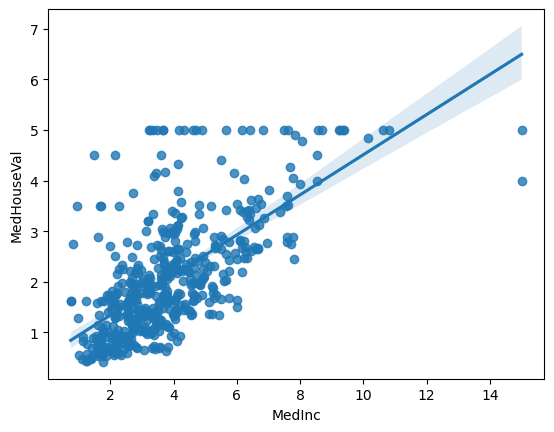

In [8]:
import seaborn as sns

sns.regplot(
    data=df.sample(500), 
    x="MedInc", 
    y="MedHouseVal"   
)

In [9]:
features

['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']

<AxesSubplot:xlabel='AveOccup', ylabel='MedHouseVal'>

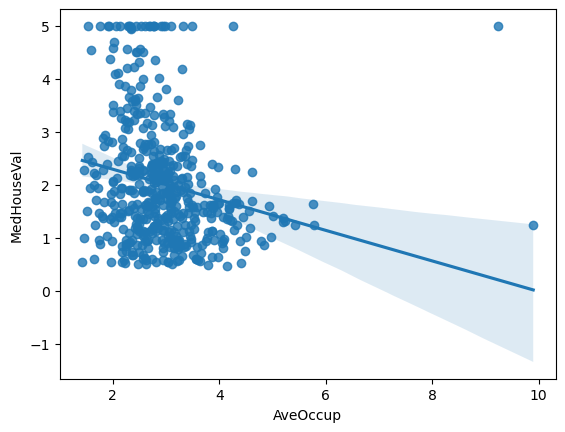

In [10]:
sns.regplot(
    data=df.sample(500), 
    x="AveOccup", 
    y="MedHouseVal"   
)

<AxesSubplot:xlabel='HouseAge', ylabel='MedHouseVal'>

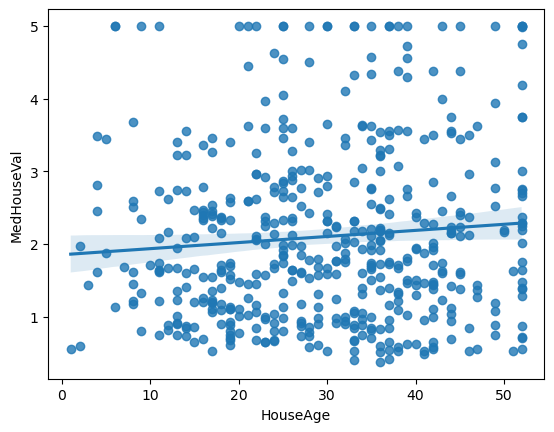

In [11]:
sns.regplot(
    data=df.sample(500), 
    x="HouseAge", 
    y="MedHouseVal"   
)

<AxesSubplot:xlabel='AveRooms', ylabel='MedHouseVal'>

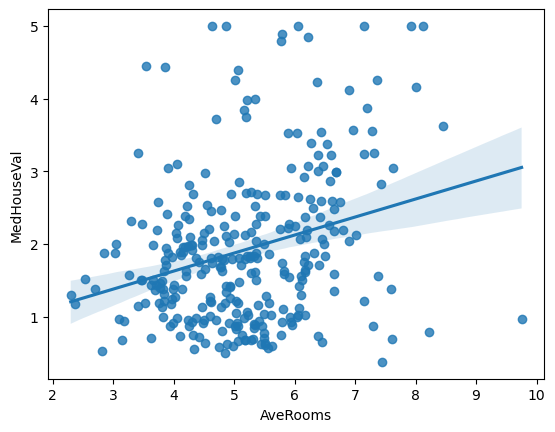

In [12]:
sns.regplot(
    data=df.loc[df.AveRooms.lt(10)].sample(300), 
    x="AveRooms", 
    y="MedHouseVal"   
)

In [13]:
X.corrwith(y, method='spearman').sort_values()

AveOccup   -0.256594
HouseAge    0.074855
AveRooms    0.263367
MedInc      0.676778
dtype: float64

In [14]:
df['base_pred'] = y.mean()

In [15]:
y.mean()

2.068558169089147

In [16]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df.MedHouseVal, df.base_pred)

0.9117043994367733

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=X, 
          y=y)

prediction_on_train = model.predict(X)

In [19]:
df['linear_model_pred'] = prediction_on_train

In [20]:
mean_absolute_error(df.MedHouseVal, df.linear_model_pred)

0.5989166020769857

In [21]:
import pandas as pd

In [22]:
coeff_series = pd.Series(model.coef_, 
                         index=X.columns)
coeff_series = coeff_series.sort_values()
coeff_series

AveRooms   -0.027349
AveOccup   -0.004461
HouseAge    0.016875
MedInc      0.443346
dtype: float64

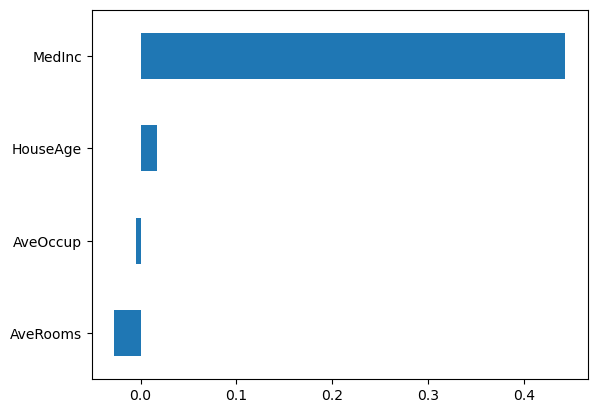

In [23]:
coeff_series.plot.barh();

In [24]:
X.describe()

,MedInc,AveOccup,HouseAge,AveRooms
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,3.070655,28.639486,5.429000
std,1.899822,10.386050,12.585558,2.474173
min,0.499900,0.692308,1.000000,0.846154
25%,2.563400,2.429741,18.000000,4.440716
50%,3.534800,2.818116,29.000000,5.229129
75%,4.743250,3.282261,37.000000,6.052381
max,15.000100,1243.333333,52.000000,141.909091


In [25]:
X

,MedInc,AveOccup,HouseAge,AveRooms
0,8.3252,2.555556,41.0,6.984127
1,8.3014,2.109842,21.0,6.238137
2,7.2574,2.802260,52.0,8.288136
3,5.6431,2.547945,52.0,5.817352
4,3.8462,2.181467,52.0,6.281853
...,...,...,...,...
20635,1.5603,2.560606,25.0,5.045455
20636,2.5568,3.122807,18.0,6.114035
20637,1.7000,2.325635,17.0,5.205543
20638,1.8672,2.123209,18.0,5.329513


In [26]:
X.mean()

MedInc       3.870671
AveOccup     3.070655
HouseAge    28.639486
AveRooms     5.429000
dtype: float64

In [27]:
normalized_X = (X - X.mean()) / X.std()
normalized_X.describe().round(4)

,MedInc,AveOccup,HouseAge,AveRooms
count,20640.0000,20640.0000,20640.0000,20640.0000
mean,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.7743,-0.2290,-2.1961,-1.8523
25%,-0.6881,-0.0617,-0.8454,-0.3994
50%,-0.1768,-0.0243,0.0286,-0.0808
75%,0.4593,0.0204,0.6643,0.2520
max,5.8581,119.4162,1.8561,55.1619


In [28]:
normalized_X

,MedInc,AveOccup,HouseAge,AveRooms
0,2.344709,-0.049595,0.982119,0.628544
1,2.332181,-0.092510,-0.607004,0.327033
2,1.782656,-0.025842,1.856137,1.155592
3,0.932945,-0.050328,1.856137,0.156962
4,-0.012881,-0.085614,1.856137,0.344702
...,...,...,...,...
20635,-1.216099,-0.049109,-0.289180,-0.155020
20636,-0.691576,0.005021,-0.845373,0.276874
20637,-1.142566,-0.071733,-0.924829,-0.090316
20638,-1.054557,-0.091223,-0.845373,-0.040210


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=normalized_X, 
          y=y)

prediction_on_train = model.predict(normalized_X)

In [30]:
df['norm_linear_model_pred'] = prediction_on_train

In [31]:
mean_absolute_error(df.MedHouseVal, df.norm_linear_model_pred)

0.5989166020769857

In [32]:
coeff_series = pd.Series(model.coef_, 
                         index=X.columns)
coeff_series = coeff_series.sort_values()
coeff_series

AveRooms   -0.067667
AveOccup   -0.046328
HouseAge    0.212384
MedInc      0.842279
dtype: float64

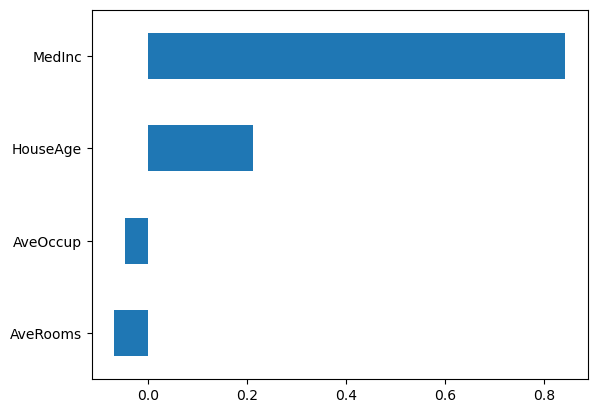

In [33]:
coeff_series.plot.barh();

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('normalization', StandardScaler()),
                 ('linear_reg', LinearRegression())])

pipe.fit(X=X, y=y)

prediction_on_train = pipe.predict(X)

In [35]:
df['norm_linear_model_pred'] = prediction_on_train

In [36]:
mean_absolute_error(df.MedHouseVal, df.norm_linear_model_pred)

0.5989166020769858

In [37]:
pipe.steps

[('normalization', StandardScaler()), ('linear_reg', LinearRegression())]

In [38]:
pipe.steps[1]

('linear_reg', LinearRegression())

In [39]:
pipe.steps[1][1]

LinearRegression()

In [40]:
pipe.steps[1][1].coef_

array([ 0.84225843, -0.0463272 ,  0.21237883, -0.06766493])

In [41]:
coeff_series = pd.Series(pipe.steps[1][1].coef_, 
                         index=X.columns)
coeff_series = coeff_series.sort_values()
coeff_series

AveRooms   -0.067665
AveOccup   -0.046327
HouseAge    0.212379
MedInc      0.842258
dtype: float64

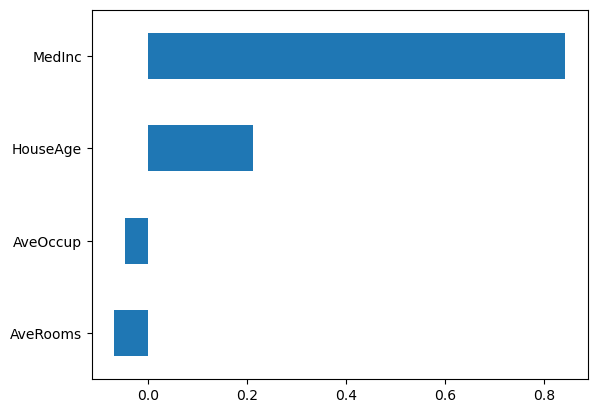

In [42]:
coeff_series.plot.barh();

In [43]:
1e-4

0.0001

In [44]:
1e-5

1e-05

In [45]:
1e-4 + 1e-5

0.00011

In [46]:
1e9

1000000000.0

In [47]:
1e-5 + 1e9

1000000000.00001

In [48]:
"%f" % 1e23

'99999999999999991611392.000000'

In [49]:
1e23

1e+23

In [50]:
1e-5 + 1e23

1e+23

In [51]:
"%f" % (1e-5 + 1e23)

'99999999999999991611392.000000'

In [52]:
df

,MedInc,AveOccup,HouseAge,AveRooms,MedHouseVal,base_pred,linear_model_pred,norm_linear_model_pred
0,8.3252,2.555556,41.0,6.984127,4.526,2.068558,4.211809,4.211809
1,8.3014,2.109842,21.0,6.238137,3.585,2.068558,3.886144,3.886144
2,7.2574,2.802260,52.0,8.288136,3.521,2.068558,3.887268,3.887268
3,5.6431,2.547945,52.0,5.817352,3.413,2.068558,3.240282,3.240282
4,3.8462,2.181467,52.0,6.281853,3.422,2.068558,2.432564,2.432564
...,...,...,...,...,...,...,...,...
20635,1.5603,2.560606,25.0,5.045455,0.781,2.068558,0.995612,0.995612
20636,2.5568,3.122807,18.0,6.114035,0.771,2.068558,1.287547,1.287547
20637,1.7000,2.325635,17.0,5.205543,0.923,2.068558,0.919215,0.919215
20638,1.8672,2.123209,18.0,5.329513,0.847,2.068558,1.007730,1.007730


# MAS PREDICTORES

In [53]:
# !pip install folium

In [54]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
df = X.copy()
df['house_price'] = y

In [55]:
import folium

# Latitude and Longitude Points
coordinates = [
    [37.7749, -122.4194],  # San Francisco
    [34.0522, -118.2437],  # Los Angeles
    [41.8781, -87.6298],   # Chicago
    [40.7128, -74.0060]    # New York
]

# Calculate the mean latitude and longitude
mean_lat = sum(coord[0] for coord in coordinates) / len(coordinates)
mean_lon = sum(coord[1] for coord in coordinates) / len(coordinates)

# Creating a base map
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=4)  # Location is the center point of the map

# Adding points to the map
for coord in coordinates:
    folium.Marker(location=coord).add_to(m)

# Save map to HTML file
m.save('centered_map.html')

# Display the map in Jupyter Notebook (if applicable)
# m


In [56]:
mean_lat = df.Latitude.mean()
mean_lon = df.Longitude.mean()
mean_lat, mean_lon

(35.63186143410853, -119.56970445736432)

In [57]:
X.shape

(20640, 8)

In [58]:
df.sample(3, random_state=0)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,1.369
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,2.413
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,2.007


In [59]:
plot_df = df.sample(1000, random_state=0)
plot_df.shape

(1000, 9)

In [60]:
# Creating a base map
m = folium.Map(location=[mean_lat, mean_lon], 
               zoom_start=5)  # Location is the center point of the map
    
for index in plot_df.index:
    row = plot_df.loc[index]
    latitude = row.Latitude
    longitude = row.Longitude
    price = row.house_price
    folium.Marker(location=(latitude, longitude)).add_to(m)
    

# Save map to HTML file
m.save('centered_map.html')

In [61]:
df.house_price.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: house_price, dtype: float64

In [62]:
import pandas as pd

cutted_prices = pd.qcut(df.house_price, 5)
cutted_prices

0            (2.9, 5.0]
1            (2.9, 5.0]
2            (2.9, 5.0]
3            (2.9, 5.0]
4            (2.9, 5.0]
              ...      
20635    (0.149, 1.072]
20636    (0.149, 1.072]
20637    (0.149, 1.072]
20638    (0.149, 1.072]
20639    (0.149, 1.072]
Name: house_price, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.149, 1.072] < (1.072, 1.573] < (1.573, 2.094] < (2.094, 2.9] < (2.9, 5.0]]

In [63]:
quintiles = [(0.149, 1.072),
             (1.072, 1.573),
             (1.573, 2.094),
             (2.094, 2.9),
             (2.9, 5.0)]

In [64]:
# Creating a base map
m = folium.Map(location=[mean_lat, mean_lon], 
               zoom_start=5)  # Location is the center point of the map


def weight_to_color(weight):
    if weight <= 1.072:
        return 'white'
    elif weight <= 1.573:
        return 'yellow'
    elif weight <= 2.094:
        return 'orange'
    elif weight <= 2.9:
        return 'red'
    else:
        return 'black'
    
    
for index in plot_df.index:
    row = plot_df.loc[index]
    latitude = row.Latitude
    longitude = row.Longitude
    price = row.house_price
    folium.CircleMarker(
        location=(latitude, longitude),
#         radius=weight_to_radius(point['weight']),
        color=weight_to_color(price),
        fill=True,
        fill_opacity=0.6
    ).add_to(m)
    

# Save map to HTML file
m.save('colored_map.html')

In [65]:
a = pd.Series([k for k in range(10)])
pd.qcut(a, 5)

0    (-0.001, 1.8]
1    (-0.001, 1.8]
2       (1.8, 3.6]
3       (1.8, 3.6]
4       (3.6, 5.4]
5       (3.6, 5.4]
6       (5.4, 7.2]
7       (5.4, 7.2]
8       (7.2, 9.0]
9       (7.2, 9.0]
dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1.8] < (1.8, 3.6] < (3.6, 5.4] < (5.4, 7.2] < (7.2, 9.0]]

In [66]:
df['latitud_quintiles'], latitud_quints = pd.qcut(
    df.Latitude, 
    5, 
    labels=[f"lat_q{k + 1}" for k in range(5)], 
    retbins=True)
df['longitude_quintiles'], longitude_quints = pd.qcut(
    df.Longitude, 
    5, 
    labels=[f"lon_q{k + 1}" for k in range(5)], 
    retbins=True)

In [67]:
latitud_quints

array([32.54, 33.87, 34.1 , 36.66, 37.81, 41.95])

In [68]:
longitude_quints

array([-124.35, -121.98, -119.91, -118.3 , -117.89, -114.31])

In [69]:
df[['Latitude', 'Longitude', 'latitud_quintiles', 'longitude_quintiles']]

,Latitude,Longitude,latitud_quintiles,longitude_quintiles
0,37.88,-122.23,lat_q5,lon_q1
1,37.86,-122.22,lat_q5,lon_q1
2,37.85,-122.24,lat_q5,lon_q1
3,37.85,-122.25,lat_q5,lon_q1
4,37.85,-122.25,lat_q5,lon_q1
...,...,...,...,...
20635,39.48,-121.09,lat_q5,lon_q2
20636,39.49,-121.21,lat_q5,lon_q2
20637,39.43,-121.22,lat_q5,lon_q2
20638,39.43,-121.32,lat_q5,lon_q2


In [70]:
df.latitud_quintiles.value_counts()

lat_q1    4252
lat_q2    4196
lat_q4    4185
lat_q5    4066
lat_q3    3941
Name: latitud_quintiles, dtype: int64

In [71]:
df['map_rectangle'] = df.latitud_quintiles.str.cat(df.longitude_quintiles, sep='__')

In [72]:
df[['Latitude', 'Longitude', 'latitud_quintiles', 'longitude_quintiles', 'map_rectangle']]

,Latitude,Longitude,latitud_quintiles,longitude_quintiles,map_rectangle
0,37.88,-122.23,lat_q5,lon_q1,lat_q5__lon_q1
1,37.86,-122.22,lat_q5,lon_q1,lat_q5__lon_q1
2,37.85,-122.24,lat_q5,lon_q1,lat_q5__lon_q1
3,37.85,-122.25,lat_q5,lon_q1,lat_q5__lon_q1
4,37.85,-122.25,lat_q5,lon_q1,lat_q5__lon_q1
...,...,...,...,...,...
20635,39.48,-121.09,lat_q5,lon_q2,lat_q5__lon_q2
20636,39.49,-121.21,lat_q5,lon_q2,lat_q5__lon_q2
20637,39.43,-121.22,lat_q5,lon_q2,lat_q5__lon_q2
20638,39.43,-121.32,lat_q5,lon_q2,lat_q5__lon_q2


In [73]:
df.map_rectangle.value_counts()

lat_q1__lon_q5    2692
lat_q3__lon_q3    2222
lat_q4__lon_q1    2199
lat_q5__lon_q2    2091
lat_q2__lon_q4    2079
lat_q5__lon_q1    1969
lat_q4__lon_q2    1543
lat_q1__lon_q4    1309
lat_q2__lon_q3    1252
lat_q2__lon_q5     865
lat_q3__lon_q4     723
lat_q3__lon_q5     541
lat_q3__lon_q2     455
lat_q4__lon_q3     441
lat_q1__lon_q3     251
lat_q5__lon_q3       6
lat_q4__lon_q4       2
Name: map_rectangle, dtype: int64

In [74]:
df.map_rectangle.isin(['lat_q5__lon_q3', 'lat_q4__lon_q4']).head()

0    False
1    False
2    False
3    False
4    False
Name: map_rectangle, dtype: bool

In [75]:
~df.map_rectangle.isin(['lat_q5__lon_q3', 'lat_q4__lon_q4']).head()

0    True
1    True
2    True
3    True
4    True
Name: map_rectangle, dtype: bool

In [76]:
invalid_map_rectangle = ['lat_q5__lon_q3', 'lat_q4__lon_q4']
filtering_mask = ~df.map_rectangle.isin(invalid_map_rectangle)

df = df.loc[filtering_mask]
df.map_rectangle.value_counts()

lat_q1__lon_q5    2692
lat_q3__lon_q3    2222
lat_q4__lon_q1    2199
lat_q5__lon_q2    2091
lat_q2__lon_q4    2079
lat_q5__lon_q1    1969
lat_q4__lon_q2    1543
lat_q1__lon_q4    1309
lat_q2__lon_q3    1252
lat_q2__lon_q5     865
lat_q3__lon_q4     723
lat_q3__lon_q5     541
lat_q3__lon_q2     455
lat_q4__lon_q3     441
lat_q1__lon_q3     251
Name: map_rectangle, dtype: int64

In [77]:
df.map_rectangle.nunique()

15

In [85]:
features = ['MedInc', 
#             'HouseAge', 
#             'AveRooms', 
#             'AveOccup', 
            'map_rectangle']
model_df = pd.get_dummies(df[features], 
                          columns=['map_rectangle'])
model_df

,MedInc,map_rectangle_lat_q1__lon_q3,map_rectangle_lat_q1__lon_q4,map_rectangle_lat_q1__lon_q5,map_rectangle_lat_q2__lon_q3,map_rectangle_lat_q2__lon_q4,map_rectangle_lat_q2__lon_q5,map_rectangle_lat_q3__lon_q2,map_rectangle_lat_q3__lon_q3,map_rectangle_lat_q3__lon_q4,map_rectangle_lat_q3__lon_q5,map_rectangle_lat_q4__lon_q1,map_rectangle_lat_q4__lon_q2,map_rectangle_lat_q4__lon_q3,map_rectangle_lat_q5__lon_q1,map_rectangle_lat_q5__lon_q2
0,8.3252,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.3014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7.2574,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.6431,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3.8462,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20636,2.5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20637,1.7000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20638,1.8672,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
X = model_df
y = df.house_price

X.shape, y.shape

((20632, 16), (20632,))

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
#     ('normalization', StandardScaler()),
                 ('linear_reg', LinearRegression())
])

pipe.fit(X=X, y=y)

prediction_on_train = pipe.predict(X)

In [88]:
mean_absolute_error(y, prediction_on_train)

0.5314028282202388

In [89]:
coeff_series = pd.Series(pipe.steps[0][1].coef_, 
                         index=X.columns)
coeff_series = coeff_series.sort_values()
coeff_series

map_rectangle_lat_q4__lon_q3   -0.849854
map_rectangle_lat_q3__lon_q5   -0.652942
map_rectangle_lat_q5__lon_q2   -0.545478
map_rectangle_lat_q2__lon_q5   -0.519296
map_rectangle_lat_q5__lon_q1   -0.137757
map_rectangle_lat_q4__lon_q2   -0.114668
map_rectangle_lat_q1__lon_q5   -0.092400
map_rectangle_lat_q2__lon_q4   -0.053647
map_rectangle_lat_q3__lon_q3   -0.026438
map_rectangle_lat_q1__lon_q4    0.130900
map_rectangle_lat_q3__lon_q2    0.133235
map_rectangle_lat_q3__lon_q4    0.300534
MedInc                          0.378183
map_rectangle_lat_q4__lon_q1    0.641520
map_rectangle_lat_q2__lon_q3    0.875871
map_rectangle_lat_q1__lon_q3    0.910422
dtype: float64

In [90]:
pipe.steps[0][1].intercept_

0.6049065832408345

In [100]:
X.shape

(20632, 16)

In [94]:
pipe.steps[0][1].coef_

array([ 0.37818295,  0.91042169,  0.13089983, -0.09240026,  0.87587077,
       -0.05364657, -0.51929639,  0.13323493, -0.0264384 ,  0.30053388,
       -0.65294213,  0.64151977, -0.11466798, -0.84985381, -0.13775738,
       -0.54547795])

In [93]:
coeff_series

map_rectangle_lat_q4__lon_q3   -0.849854
map_rectangle_lat_q3__lon_q5   -0.652942
map_rectangle_lat_q5__lon_q2   -0.545478
map_rectangle_lat_q2__lon_q5   -0.519296
map_rectangle_lat_q5__lon_q1   -0.137757
map_rectangle_lat_q4__lon_q2   -0.114668
map_rectangle_lat_q1__lon_q5   -0.092400
map_rectangle_lat_q2__lon_q4   -0.053647
map_rectangle_lat_q3__lon_q3   -0.026438
map_rectangle_lat_q1__lon_q4    0.130900
map_rectangle_lat_q3__lon_q2    0.133235
map_rectangle_lat_q3__lon_q4    0.300534
MedInc                          0.378183
map_rectangle_lat_q4__lon_q1    0.641520
map_rectangle_lat_q2__lon_q3    0.875871
map_rectangle_lat_q1__lon_q3    0.910422
dtype: float64

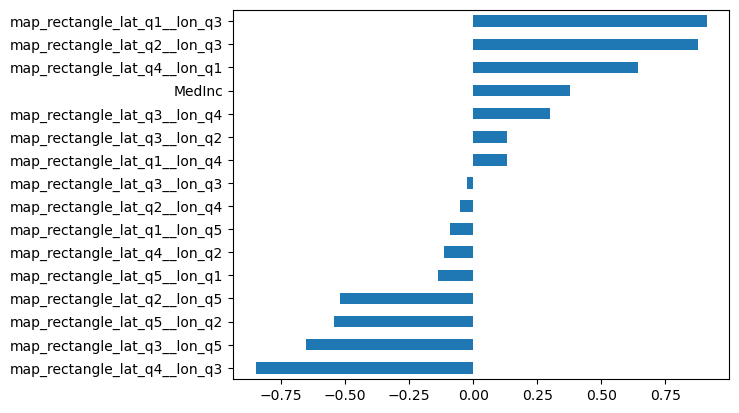

In [91]:
coeff_series.plot.barh();

## Dividimos en entrenamiento y test

In [43]:
X.shape, y.shape

((20640, 4), (20640,))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 4), (16512,), (4128, 4), (4128,))

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
#     ('normalization', StandardScaler()),
                 ('linear_reg', LinearRegression())
])

pipe.fit(X=X_train, 
         y=y_train)

prediction_on_train = pipe.predict(X_train)
prediction_on_test = pipe.predict(X_test)

In [228]:
mean_absolute_error(y_train, prediction_on_train)

0.52742390588755

In [229]:
mean_absolute_error(y_test, prediction_on_test)

0.5293345748444792

# Usamos una clase que selecciona los predictores

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [130]:
from sklearn.linear_model import Ridge

alphas = [0.00001, 1.0, 100.0, 10000.0, 1_000_000.0, 1_000_000_000.0
         ]

for alpha in alphas:    
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    print(f"\nAlpha is: {alpha} and coefs are:\n", model.coef_)
    print('*' * 80)


Alpha is: 1e-05 and coefs are:
 [ 0.38206975  0.8843406   0.14387517 -0.10058677  0.87421211 -0.03996544
 -0.52613552  0.09907743 -0.02989237  0.33609665 -0.65331473  0.62474743
 -0.10335745 -0.83797895 -0.13179891 -0.53931917]
********************************************************************************

Alpha is: 1.0 and coefs are:
 [ 0.38212776  0.88004077  0.14379894 -0.10046951  0.87338454 -0.03981378
 -0.52530376  0.09890197 -0.02979524  0.33557137 -0.65168956  0.62443828
 -0.10319577 -0.83536752 -0.13162385 -0.53887688]
********************************************************************************

Alpha is: 100.0 and coefs are:
 [ 0.38649298  0.59257162  0.1335717  -0.09306111  0.7956692  -0.03056638
 -0.45695568  0.08171088 -0.02456137  0.28822189 -0.52501968  0.5923962
 -0.09211336 -0.6401029  -0.11941744 -0.50234358]
********************************************************************************

Alpha is: 10000.0 and coefs are:
 [ 0.35822186  0.01852114  0.01432085 -

-1.3 * 10^-3

In [129]:
-1.30155331e-03

-0.00130155331

In [131]:
-2.79781451e-07

-2.79781451e-07

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV


alphas = [0.001, 0.01, 0.1, 1.0, 3.0, 6.0, 10.0, 100.0]
pipe = Pipeline([
#     ('normalization', StandardScaler()),
                 ('ridge', RidgeCV(alphas=alphas, cv=5))
])

pipe.fit(X=X_train, 
         y=y_train)

prediction_on_train = pipe.predict(X_train)
prediction_on_test = pipe.predict(X_test)

In [117]:
ridge_model = pipe.steps[0][1]
ridge_model.alpha_

1.0

In [120]:
mean_absolute_error(y_train, prediction_on_train)

0.5308362303648518

In [121]:
mean_absolute_error(y_test, prediction_on_test)

0.5323484240378046

# Árboles de decisión

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [46]:
import numpy as np

In [47]:
np.mean([10.8, 9.5, 3.4, 4.6])

7.074999999999999

In [48]:
np.std([10.8, 9.5, 3.4, 4.6])

3.1379730719048564

In [49]:
np.mean([10.8, 9.5])

10.15

In [50]:
np.std([10.8, 9.5])

0.6500000000000004

In [51]:
np.mean([3.4, 4.6])

4.0

In [52]:
np.std([3.4, 4.6])

0.5999999999999999

In [55]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X=X_train, y=y_train)

prediction_on_train = model.predict(X_train)
prediction_on_test = model.predict(X_test)

In [56]:
mean_absolute_error(y_train, prediction_on_train)

2.7486626239508478e-17

In [57]:
mean_absolute_error(y_test, prediction_on_test)

0.6610966690891473

In [153]:
X_train.shape

(16505, 16)

In [151]:
model.get_n_leaves()

14879

In [154]:
X_train.shape[0] / model.get_n_leaves()

1.1092815377377512

In [147]:
model.get_depth()

49

In [148]:
2 ** 49

562949953421312

Regularizamos con **min_samples_leaf** y **max_leaf_nodes**


In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=30, 
                              max_leaf_nodes=2 ** 12)
model.fit(X=X_train, y=y_train)

prediction_on_train = model.predict(X_train)
prediction_on_test = model.predict(X_test)

In [59]:
mean_absolute_error(y_train, prediction_on_train)

0.4381911986007714

In [60]:
mean_absolute_error(y_test, prediction_on_test)

0.495931474577224

# Sin ingeniería de atributos

In [63]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
df = X.copy()
df['house_price'] = y
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [64]:
X = df[['MedInc', 'Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'AveOccup']]
y = df.house_price
X.shape, y.shape

((20640, 6), (20640,))

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [66]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=30, 
                              max_leaf_nodes=2 ** 12)
model.fit(X=X_train, y=y_train)

prediction_on_train = model.predict(X_train)
prediction_on_test = model.predict(X_test)

In [67]:
mean_absolute_error(y_train, prediction_on_train)

0.3618869392662397

In [68]:
mean_absolute_error(y_test, prediction_on_test)

0.40986598515939865

In [71]:
model.get_depth()

15

In [72]:
model.get_n_leaves()

427

In [73]:
X_train.shape

(16512, 6)

In [74]:
y_train.var()

1.3384525597850536

In [75]:
y_train.mean()

2.072498958938953

In [76]:
X_train.columns

Index(['MedInc', 'Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'AveOccup'], dtype='object')

In [77]:
X_train.columns[4]

'AveRooms'

In [78]:
X_train.columns[5]

'AveOccup'

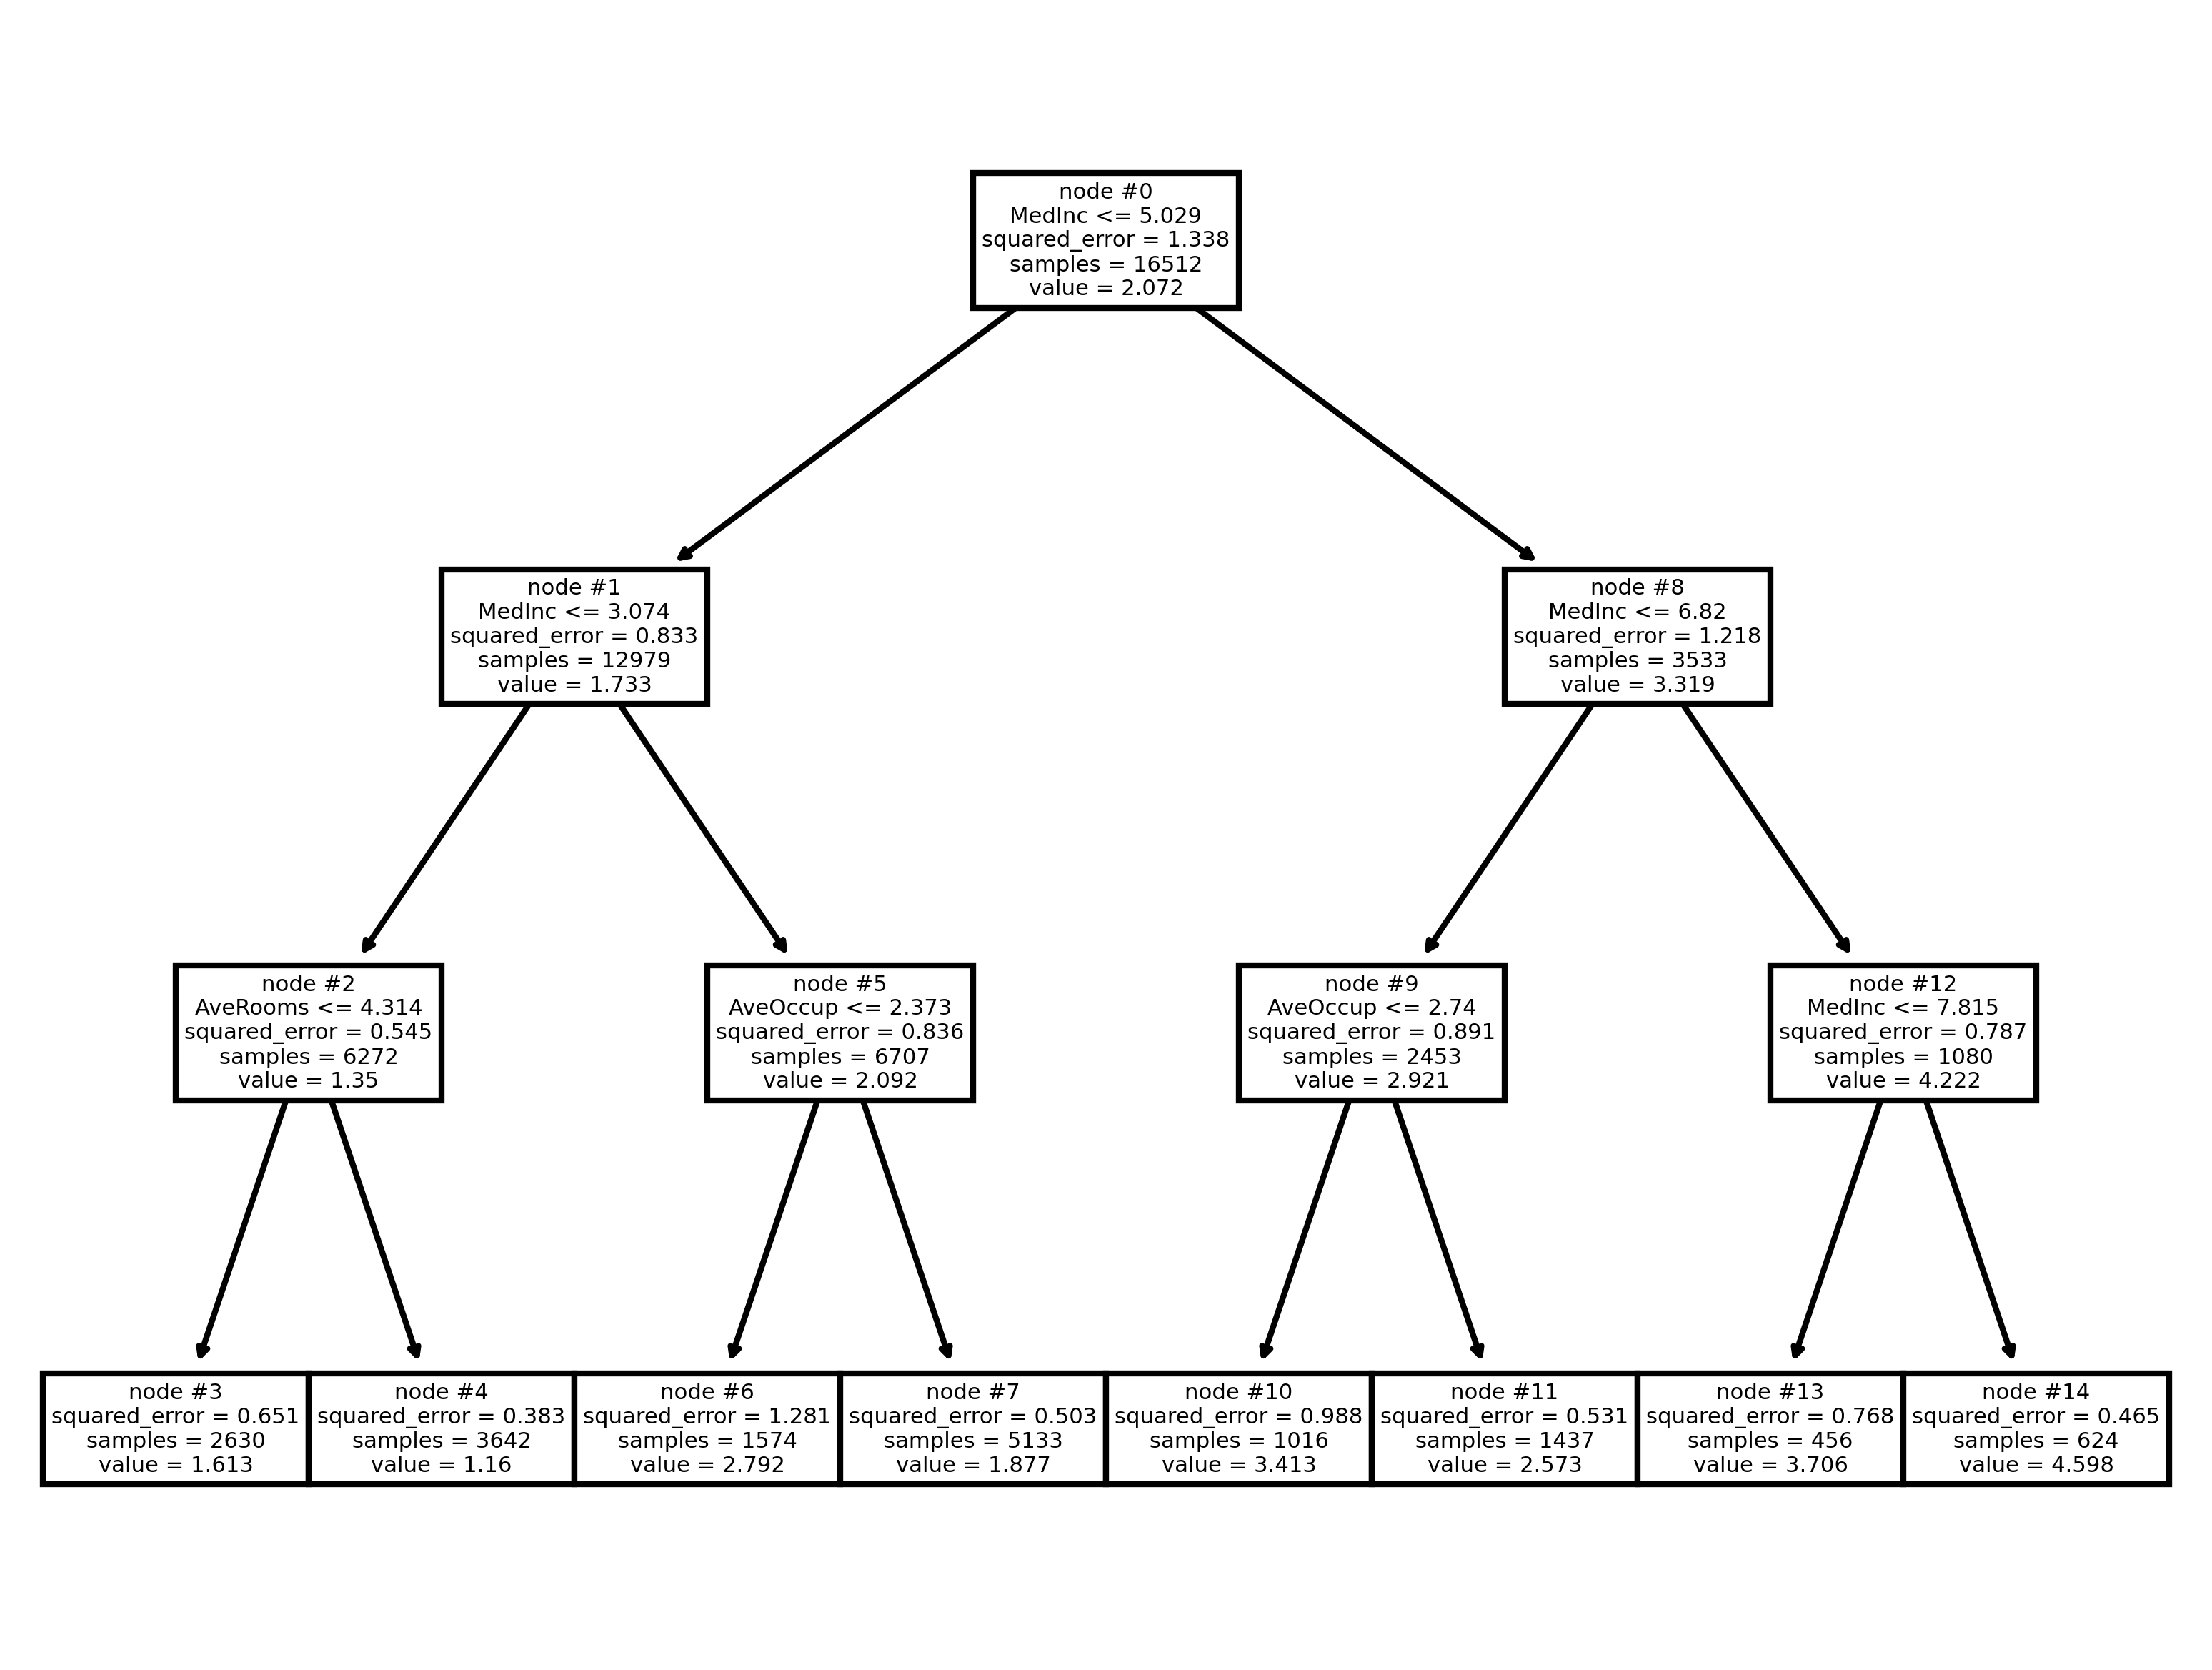

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.rcParams["figure.dpi"] = 600

model = DecisionTreeRegressor(min_samples_leaf=30, 
                              max_depth=3)
model.fit(X=X_train, y=y_train)

plot_tree(model, 
          feature_names=X_train.columns.to_list(), 
          node_ids=True)
plt.show()

In [95]:
model.predict(X_test[3:4])

array([1.15966421])

In [94]:
node_path = np.where(model.decision_path(X_test[3:4]).todense() == 1)[1]
node_path

array([0, 1, 2, 4])

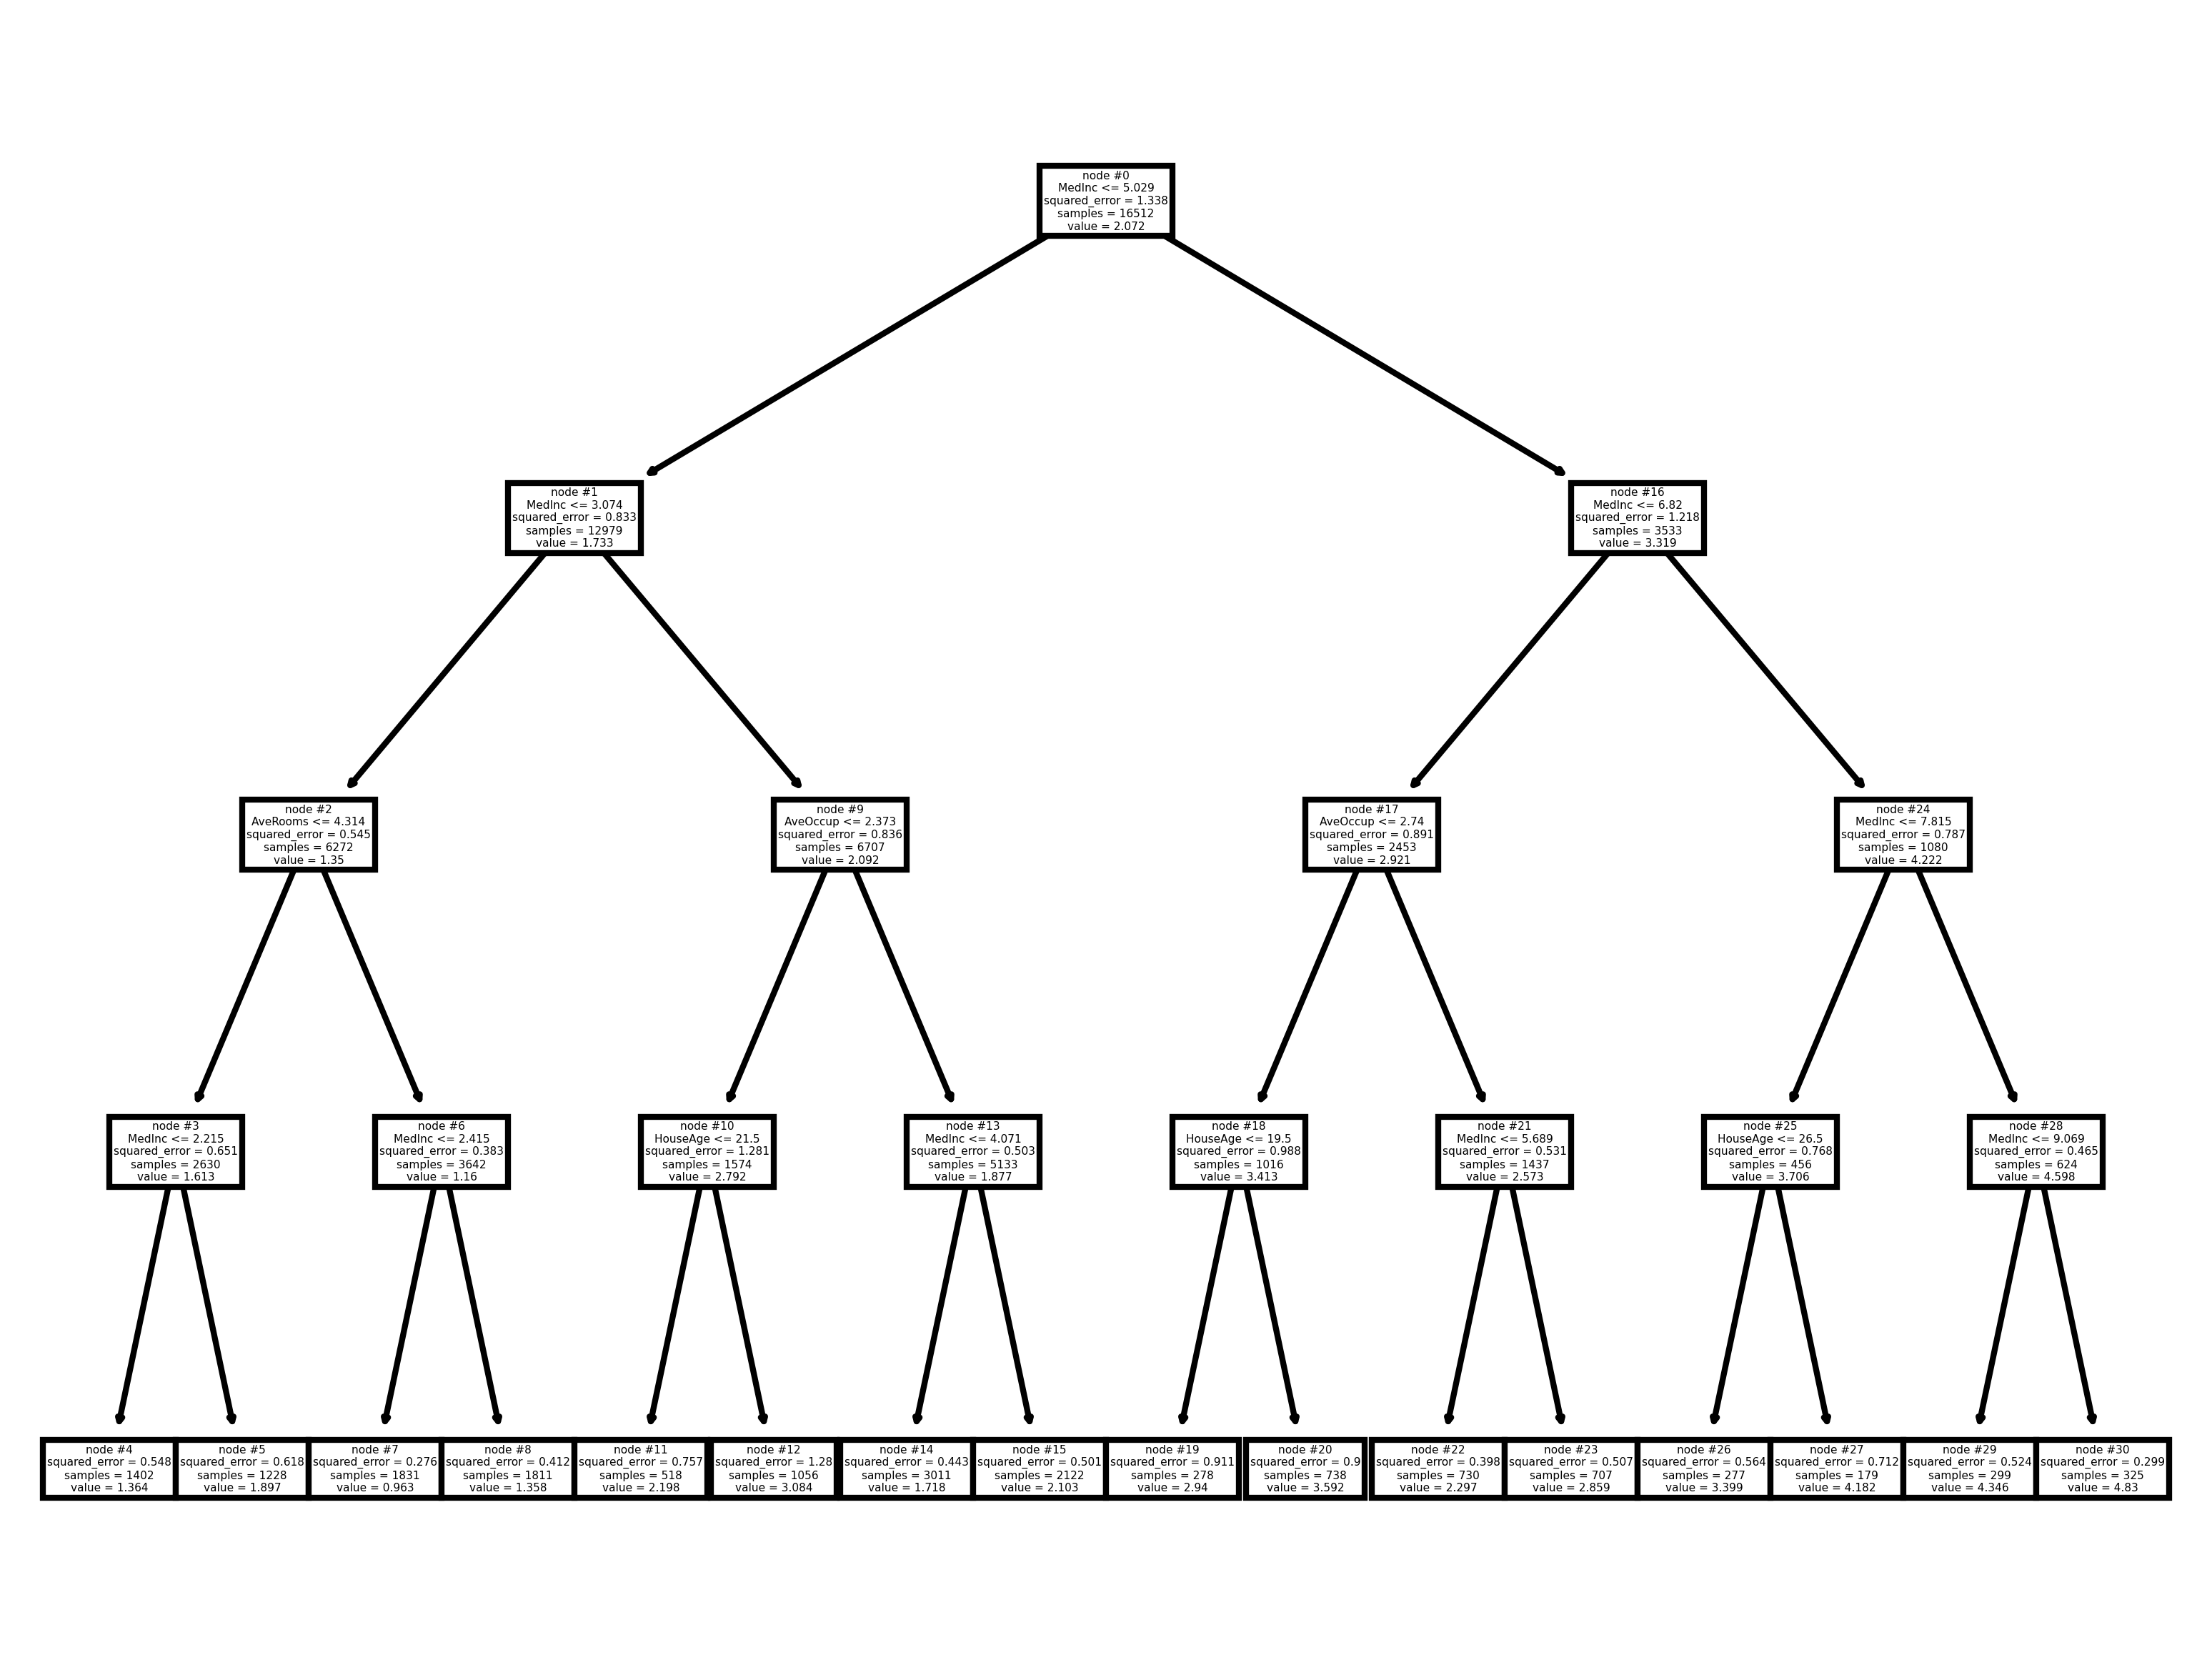

In [96]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.rcParams["figure.dpi"] = 600

model = DecisionTreeRegressor(min_samples_leaf=30, 
                              max_depth=4)
model.fit(X=X_train, y=y_train)

plot_tree(model, 
          feature_names=X_train.columns.to_list(),
          node_ids=True)
plt.show()

In [86]:
model.predict(X_test[:1])

array([2.10259809])

In [87]:
X_test[:1]

,MedInc,Latitude,Longitude,HouseAge,AveRooms,AveOccup
14740,4.1518,32.58,-117.05,22.0,5.663073,4.180593


In [85]:
model.decision_path(X_test[:1]).todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [99]:
feat_importances = pd.Series(model.feature_importances_, 
                             index=X_train.columns).sort_values(ascending=False)
feat_importances

MedInc       0.834205
AveOccup     0.109273
HouseAge     0.032563
AveRooms     0.023959
Latitude     0.000000
Longitude    0.000000
dtype: float64

<AxesSubplot:>

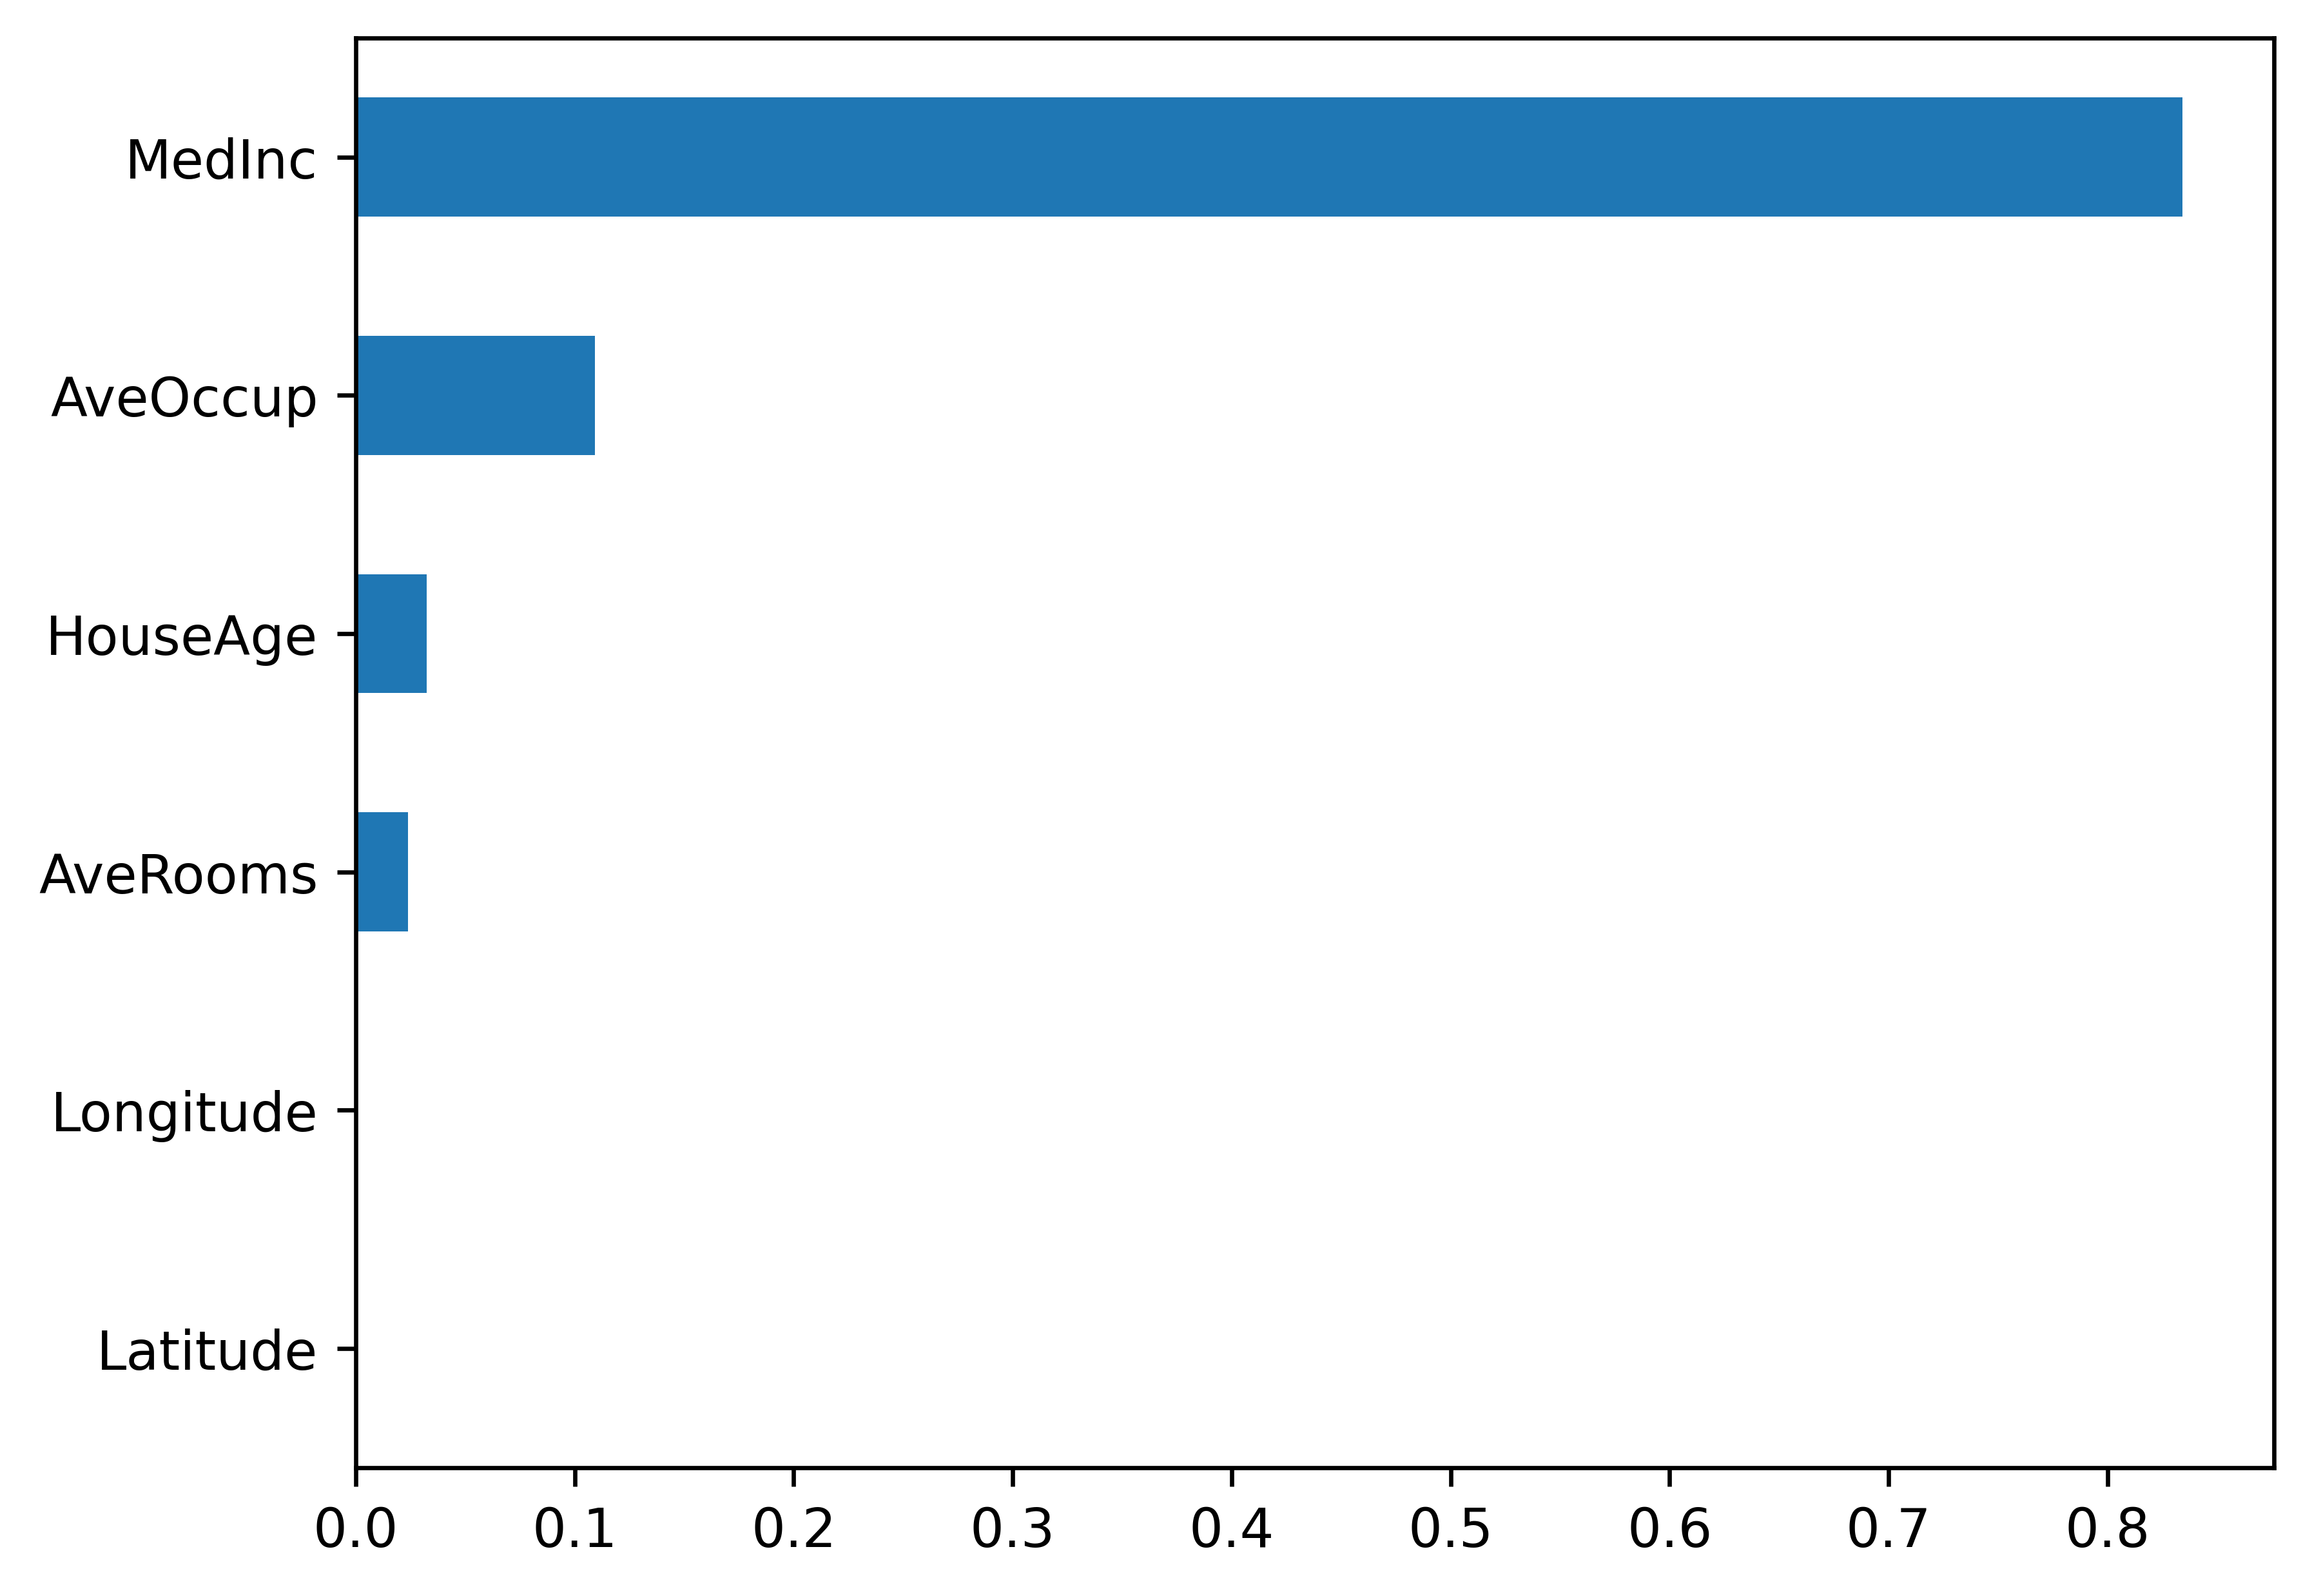

In [101]:
feat_importances.sort_values().plot.barh()

In [206]:
X_train.sample(5)

,MedInc,Latitude,Longitude,HouseAge,AveRooms,AveOccup
474,1.9327,37.86,-122.28,52.0,4.564045,2.152809
3056,3.1760,35.59,-119.35,14.0,5.949672,3.275711
19896,1.9135,36.30,-119.21,18.0,5.192029,3.956522
414,4.1250,37.89,-122.28,52.0,5.371663,2.227926
9525,4.4250,39.15,-123.17,30.0,5.858462,2.510769
